In [510]:
%matplotlib inline

import os
import h5py
import numpy as np
from scipy.signal import detrend, butter, filtfilt
from obspy import UTCDateTime
from pyproj import Proj
import matplotlib.pyplot as plt

os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

### Format tap-test location/time info

In [511]:
csvfile = 'harper_tap_test_waypoints.csv'

tmp = np.genfromtxt(csvfile,delimiter=',',skip_header=1,dtype=str)
lon = tmp[:,0].astype(float)
lat = tmp[:,1].astype(float)
ele = tmp[:,2].astype(float)
timestr = tmp[:,3]

In [512]:
timestr2datetime = lambda ts: UTCDateTime.strptime(ts,format='%Y/%m/%d %H:%M:%S+00')

times = [timestr2datetime(time) for time in timestr]

In [513]:
myProj = Proj("+proj=utm +zone=29 +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
x,y = myProj(lon,lat)

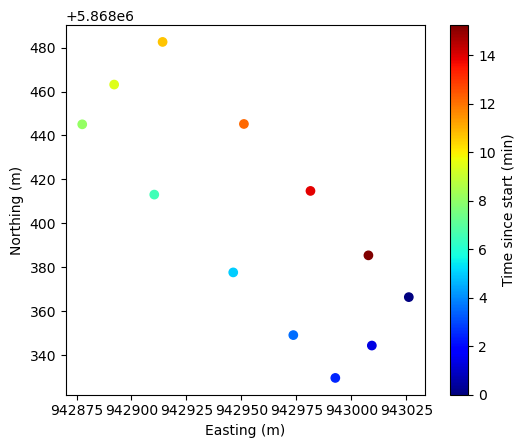

In [514]:
dt = (np.array(times) - times[0]) * (1./60)

plt.figure()
im = plt.scatter(x,y,c=dt,cmap='jet')
plt.colorbar(im,label='Time since start (min)')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.gca().set_aspect('equal')

### Set up data paths

In [515]:
fdir = '/1-fnp/petasaur/p-wd05/harper_plots'
flist = np.array(os.listdir(fdir))

fname2datetime = lambda fn: UTCDateTime.strptime(fn,format='%Y-%m-%d_%H.%M.%S')

ftime = np.array([fname2datetime('_'.join(fname.split('_')[1:3])) for fname in flist])
index = np.argsort(np.array(ftime)-ftime[0])
flist = flist[index]
ftime = ftime[index]

In [516]:
# File indices closest in time to each tap
finds = [np.argmin(abs(ftime-t)) for t in times]

### Plot data and manually coregister

<u>Workflow:</u>
- Load the 1-min file of data closest to each tap in time
- Filter in a lower frequency band e.g. 5-15 Hz and plot
- Visually identify a tap
- Zoom in, filter to higher frequencies, plot again (iterate until clear)
- Pick the closest channel to the source

In [517]:
class taptest_visualizer:
    
    def __init__(self,fpath,fac):
        with h5py.File(fpath,'r') as fp:
            self.fs = fp['Acquisition']['Raw[0]'].attrs['OutputDataRate']//fac
            self.nx = fp['Acquisition']['Raw[0]'].attrs['NumberOfLoci']
            self.ns = len(fp['Acquisition']['Raw[0]']['RawDataTime'][:])//fac
            self.data = fp['Acquisition']['Raw[0]']['RawData'][::fac,:]
        self.data -= np.tile(np.mean(self.data,axis=0),(self.ns,1))
        self.filt = self.data.copy()
        return
    
    def filter_data(self,fmin,fmax):
        b,a = butter(4,(fmin,fmax),fs=self.fs,btype='bandpass')
        self.filt = filtfilt(b,a,self.data,axis=0)
        return
    
    def plot_data(self,xlims=[0,312],ylims=[60,0],clims=[-1,1],srcx=0):
        plt.figure(figsize=(10,6)); v = 0.8
        plt.imshow(self.filt,aspect='auto',cmap='seismic',\
                   extent=[0,self.nx,self.ns/self.fs,0],vmin=clims[0],vmax=clims[1])
        plt.xlabel('Channel number')
        plt.ylabel('Time (s)')
        plt.ylim(ylims)
        plt.xlim(xlims)
        plt.axvline(srcx,c='y',linewidth=3)
        return

#### Tap 1

In [518]:
# get nearest file
ind = finds[0]
fpath = os.path.join(fdir,flist[ind])

# cut time by factor of 10 for easier visualization (the aliasing isn't too bad)
fac = 10

# load data
tv = taptest_visualizer(fpath,fac)

In [519]:
# separate cells so re-filtering and re-plotting can be done without re-loading data
tv.filter_data(10,90)

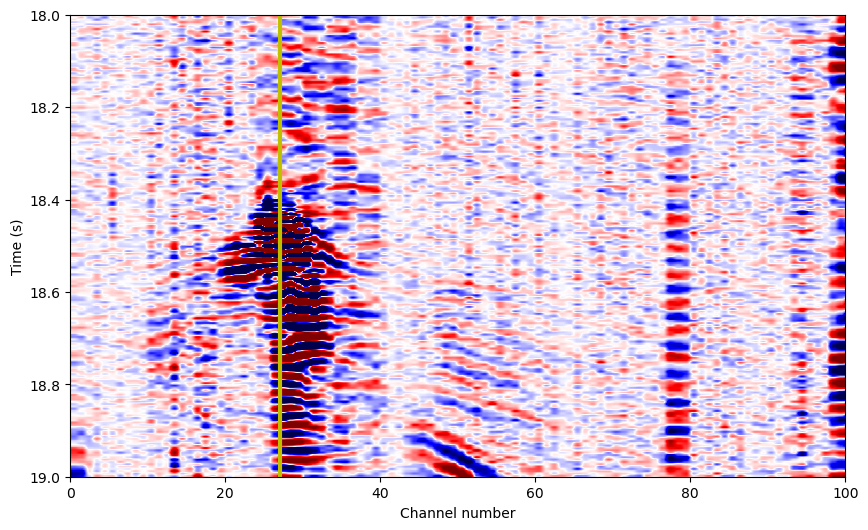

In [520]:
tv.plot_data(xlims=[0,100],ylims=[19,18],clims=[-0.8,0.8],srcx=27)

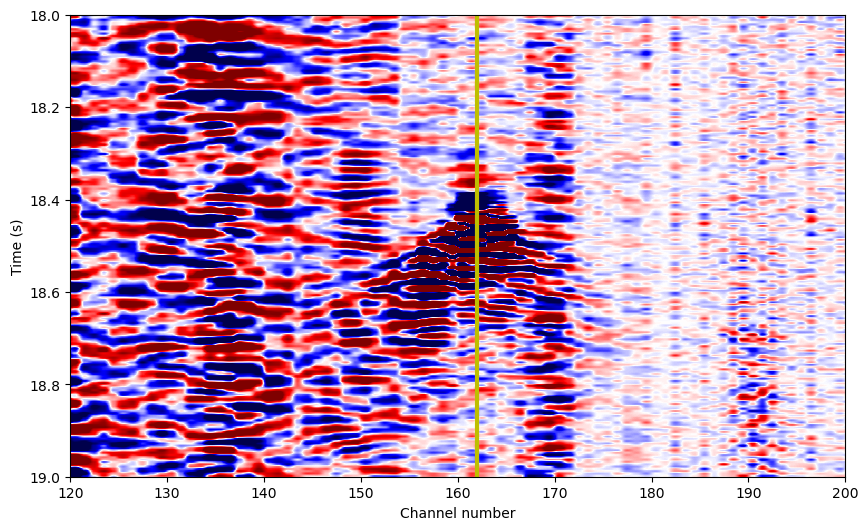

In [521]:
# there is a second location for the first tap
tv.plot_data(xlims=[120,200],ylims=[19,18],clims=[-0.8,0.8],srcx=162)

#### Tap 2

In [522]:
ind = finds[1]
fpath = os.path.join(fdir,flist[ind])
fac = 10

tv = taptest_visualizer(fpath,fac)

In [523]:
tv.filter_data(10,90)

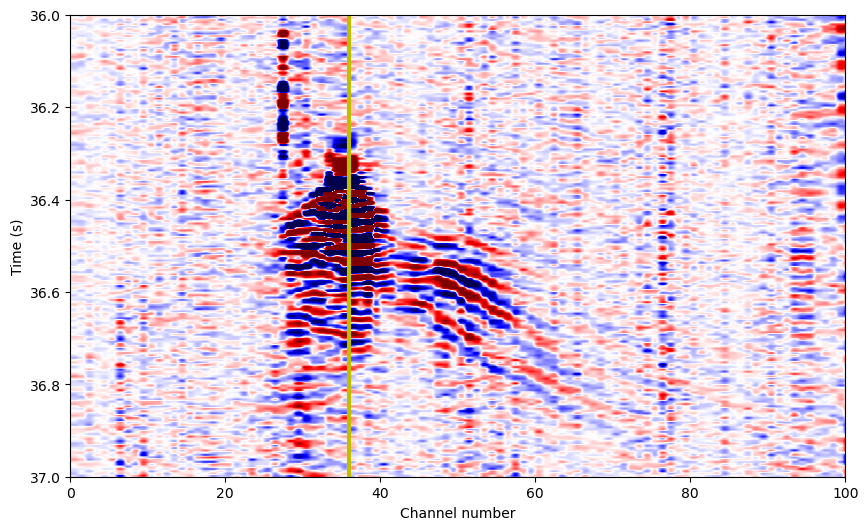

In [524]:
tv.plot_data(xlims=[0,100],ylims=[37,36],clims=[-0.8,0.8],srcx=36)

#### Tap 3

In [525]:
ind = finds[2]
fpath = os.path.join(fdir,flist[ind])
fac = 10

tv = taptest_visualizer(fpath,fac)

In [526]:
tv.filter_data(10,90)

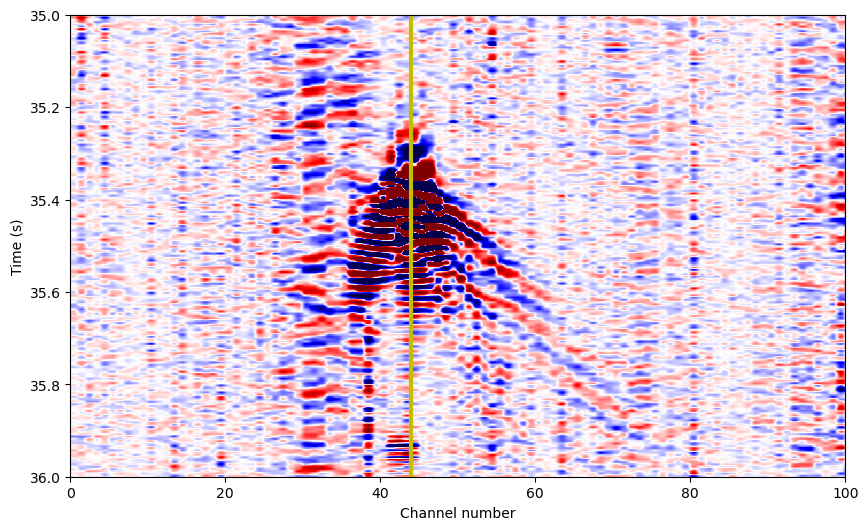

In [527]:
tv.plot_data(xlims=[0,100],ylims=[36,35],clims=[-0.8,0.8],srcx=44)

#### Tap 4

In [528]:
ind = finds[3] - 1 # need to go to adjacent file because timestamps are inexact
fpath = os.path.join(fdir,flist[ind])
fac = 10

tv = taptest_visualizer(fpath,fac)

In [529]:
tv.filter_data(10,90)

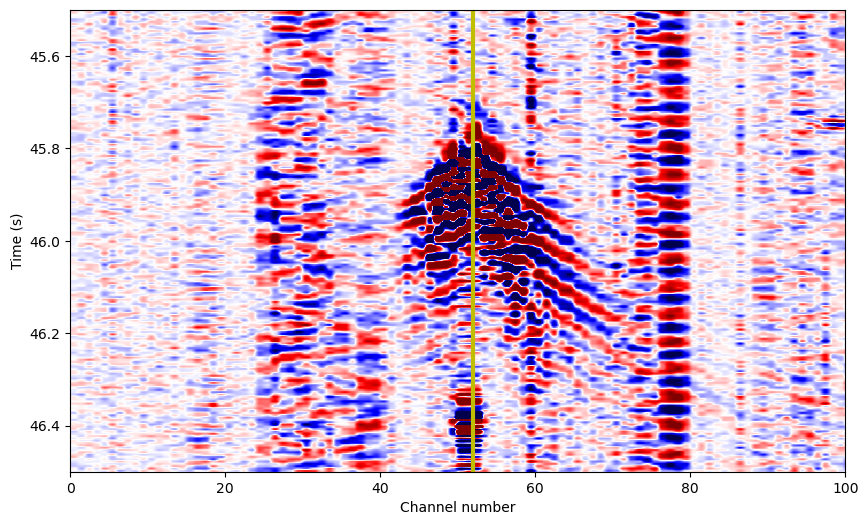

In [530]:
tv.plot_data(xlims=[0,100],ylims=[46.5,45.5],clims=[-0.8,0.8],srcx=52)

#### Tap 5

In [531]:
ind = finds[4]
fpath = os.path.join(fdir,flist[ind])
fac = 10

tv = taptest_visualizer(fpath,fac)

In [532]:
tv.filter_data(10,90)

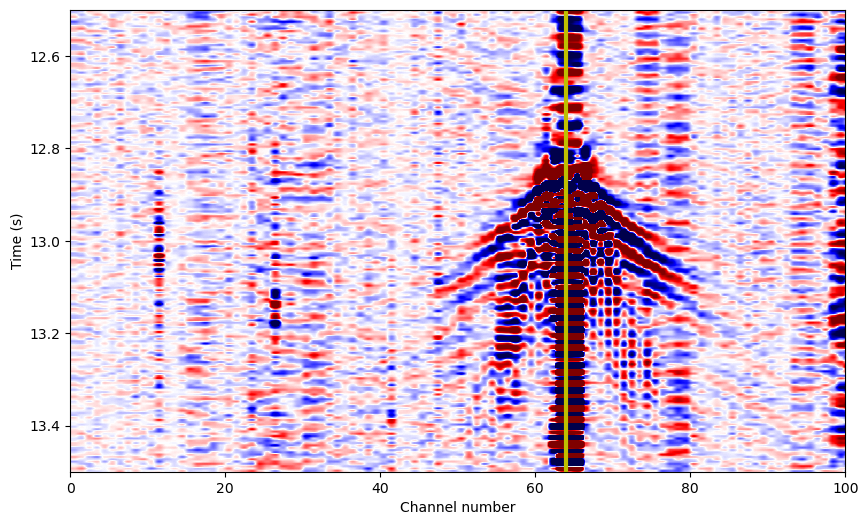

In [533]:
tv.plot_data(xlims=[0,100],ylims=[13.5,12.5],clims=[-0.8,0.8],srcx=64)

#### Tap 6

In [534]:
ind = finds[5]-1
fpath = os.path.join(fdir,flist[ind])
fac = 10

tv = taptest_visualizer(fpath,fac)

In [535]:
tv.filter_data(10,90)

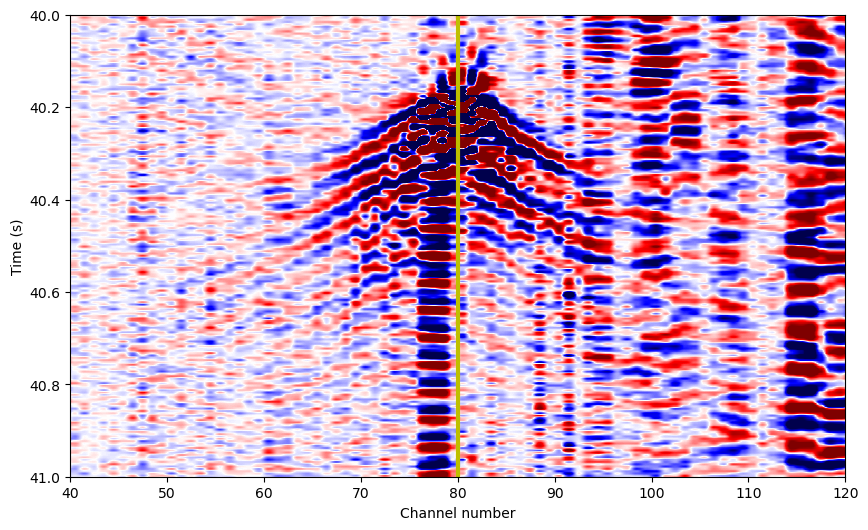

In [536]:
tv.plot_data(xlims=[40,120],ylims=[41,40],clims=[-0.8,0.8],srcx=80)

#### Tap 7

In [537]:
ind = finds[6]
fpath = os.path.join(fdir,flist[ind])
fac = 10

tv = taptest_visualizer(fpath,fac)

In [538]:
tv.filter_data(10,90)

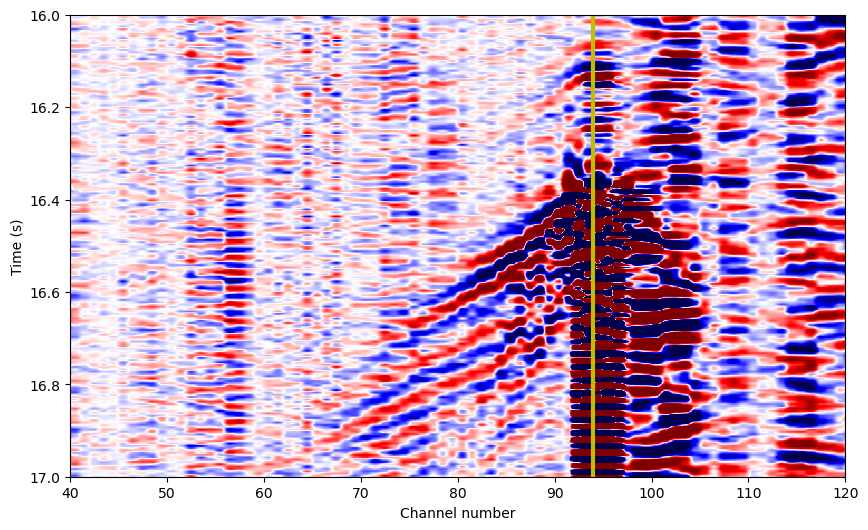

In [539]:
tv.plot_data(xlims=[40,120],ylims=[17,16],clims=[-0.8,0.8],srcx=94)

#### Tap 8

In [540]:
ind = finds[7]
fpath = os.path.join(fdir,flist[ind])
fac = 10

tv = taptest_visualizer(fpath,fac)

In [541]:
tv.filter_data(10,90)

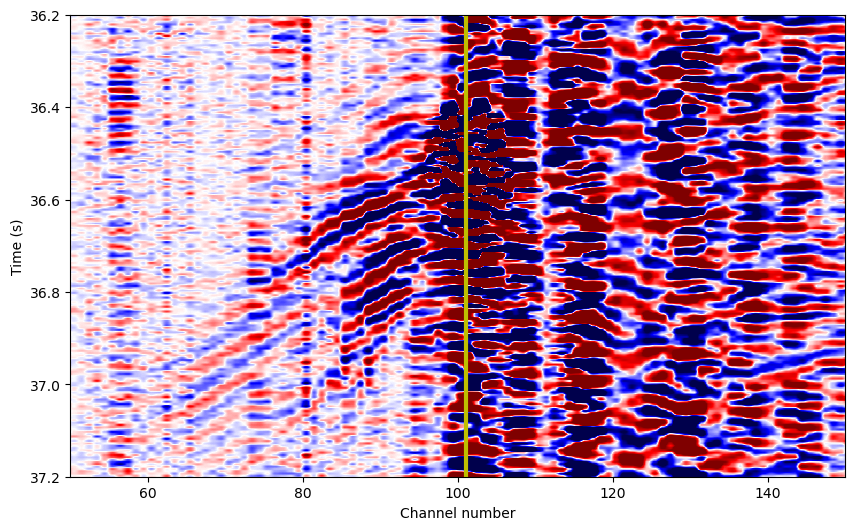

In [542]:
tv.plot_data(xlims=[50,150],ylims=[37.2,36.2],clims=[-0.8,0.8],srcx=101)

#### Tap 9

In [543]:
ind = finds[8]-1
fpath = os.path.join(fdir,flist[ind])
fac = 10

tv = taptest_visualizer(fpath,fac)

In [544]:
tv.filter_data(10,90)

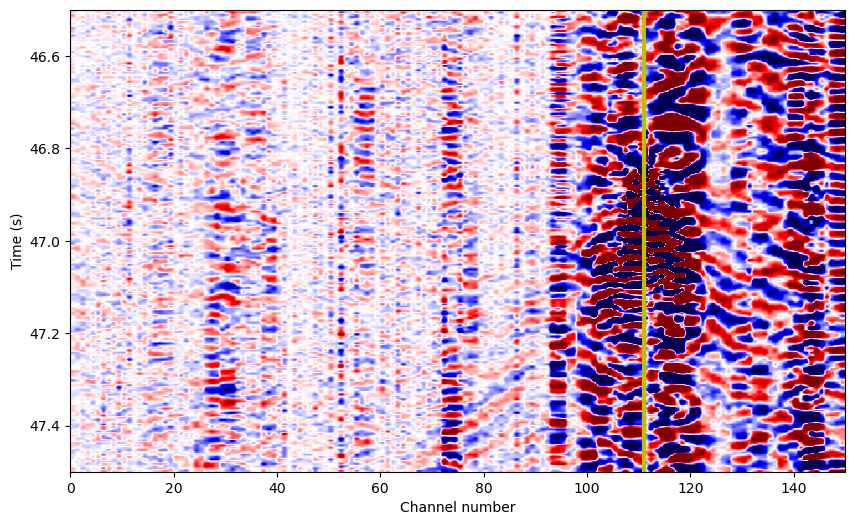

In [545]:
tv.plot_data(xlims=[0,150],ylims=[47.5,46.5],clims=[-0.8,0.8],srcx=111)

#### Tap 10

In [546]:
ind = finds[9]
fpath = os.path.join(fdir,flist[ind])
fac = 10

tv = taptest_visualizer(fpath,fac)

In [547]:
tv.filter_data(10,90)

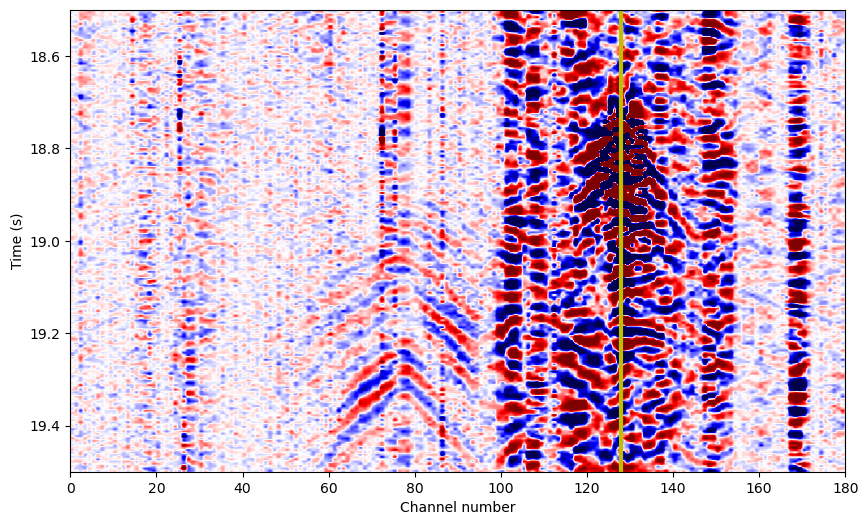

In [548]:
tv.plot_data(xlims=[0,180],ylims=[19.5,18.5],clims=[-0.8,0.8],srcx=128)

#### Tap 11

In [549]:
ind = finds[10]
fpath = os.path.join(fdir,flist[ind])
fac = 10

tv = taptest_visualizer(fpath,fac)

In [550]:
tv.filter_data(10,90)

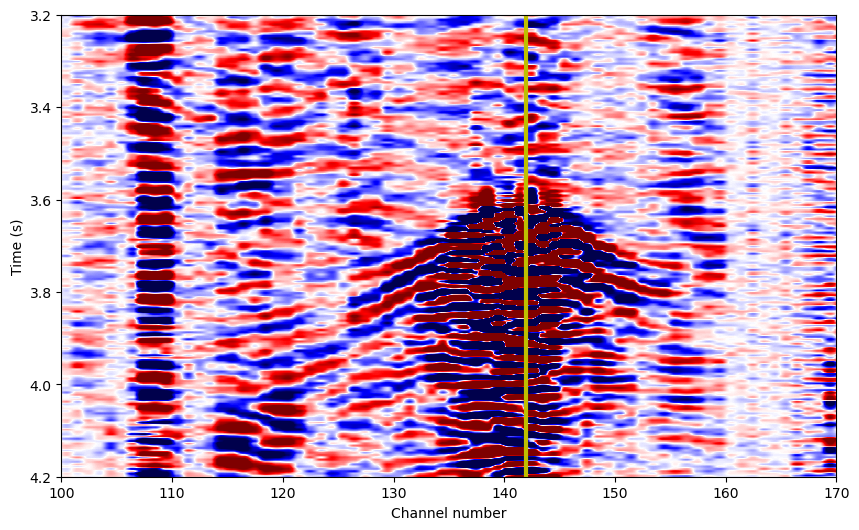

In [551]:
tv.plot_data(xlims=[100,170],ylims=[4.2,3.2],clims=[-0.8,0.8],srcx=142)

#### Tap 12

In [552]:
ind = finds[11]
fpath = os.path.join(fdir,flist[ind])
fac = 10

tv = taptest_visualizer(fpath,fac)

In [553]:
tv.filter_data(10,90)

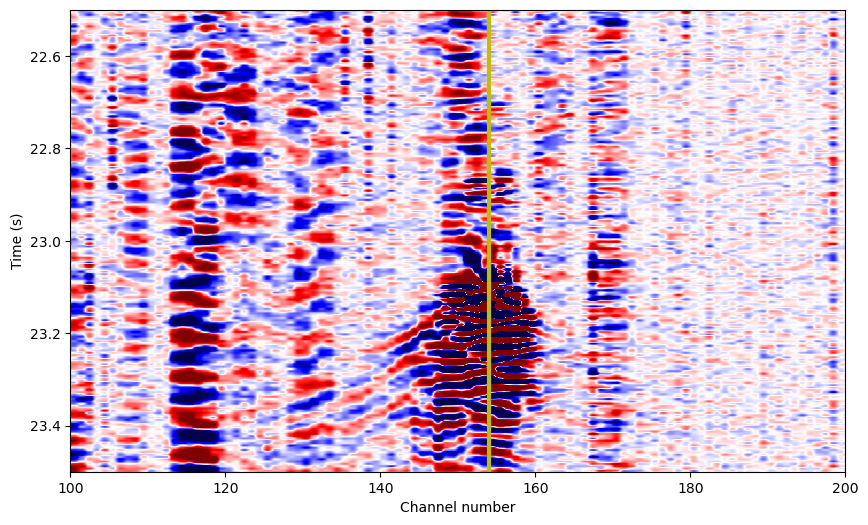

In [554]:
tv.plot_data(xlims=[100,200],ylims=[23.5,22.5],clims=[-0.8,0.8],srcx=154)

### Collect tap-test results

In [555]:
chans = [27,36,44,52,64,80,94,101,111,128,142,154,162]

In [556]:
# Add first tap point to end since it appears twice in data
xg = np.concatenate((x,[x[0]]),axis=0)
yg = np.concatenate((y,[y[0]]),axis=0)

# Get cumulative geographic distance
ddx = np.diff(xg)
ddy = np.diff(yg)
ddi = np.sqrt(ddx**2 + ddy**2)
ud = np.cumsum(ddi)
ud = np.concatenate(([0],ud),axis=0)

In [557]:
# Get cumulative optical distance
dx = 3.1904762684
uc = (np.array(chans)-chans[0]) * dx

Text(0.5, 0, 'Channel number')

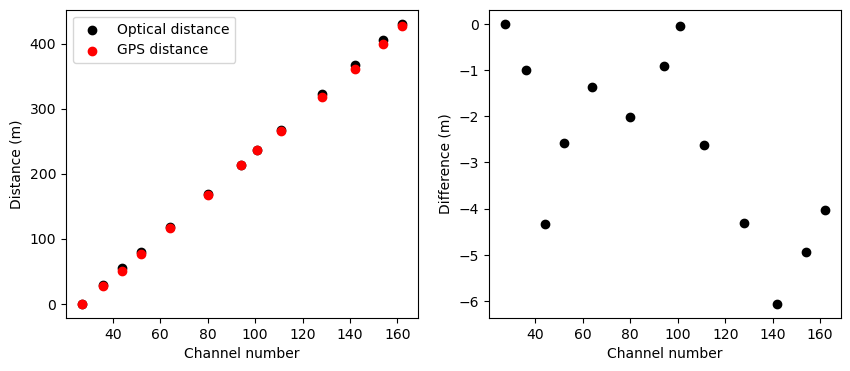

In [558]:
fig,ax = plt.subplots(1,2,sharex=True,figsize=(10,4))
ax[0].scatter(chans,uc,c='k',label='Optical distance')
ax[0].scatter(chans,ud,c='r',label='GPS distance')
ax[0].set_xlabel('Channel number')
ax[0].set_ylabel('Distance (m)')
ax[0].legend(loc='upper left')
ax[1].scatter(chans,ud-uc,c='k')
ax[1].set_ylabel('Difference (m)')
ax[1].set_xlabel('Channel number')

Without removing any fiber loops, the channel spacing interpolated between tap points will not exactly match the optical distance. This can be corrected by subtracting the difference between geographic and optical distances between any two tap points and linearly extrapolating the channel positions using the fixed optical channel distance. The residual is then ascribed to a fiber loop and ignored. However, there are only three slack loops in the field: at tap points 3, 7, and 9. Simply adjusting these locations cannot correct the residual across all segments. Much of the error is probably a result of curvature of the cable path between tap points and/or GPS error at tap points and cannot be corrected. 

- The previous picking assumes that each tap occurs exactly at an integer channel location, the coregistration uncertainty is therefore 3-9 m, somewhere between 1 channel spacing and 1 gauge length
- The residual between optical/geographic distance for both each segment and the whole fiber (shown above) is 3-6 m, which is consistent with the manual tap test coregistration uncertainty
- The total distance in fiber loops is likely less than 6 m, which is less than 1 channel per loop, meaning an exact fiber loop correction will be difficult

### Interpolate channel positions between tap points, version 1

Linear interpolation between each tap point, total distance is fixed, channel spacing is flexible

In [559]:
ch = np.arange(chans[0],chans[-1]+1)
du = np.linspace(0,uc.max(),chans[-1]-chans[0]+1)
xn = np.interp(du,uc,xg)
yn = np.interp(du,uc,yg)

lonn,latn = myProj(xn,yn,inverse=True)

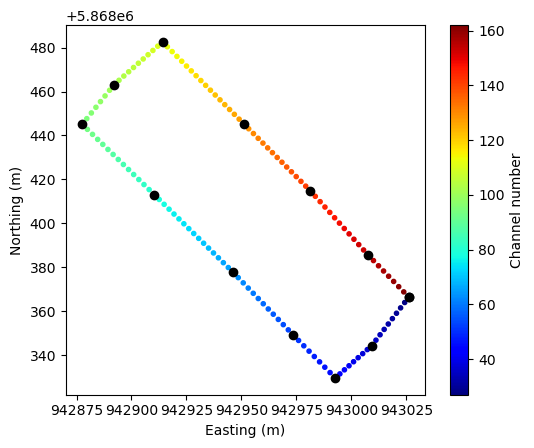

In [560]:
plt.figure()
cb = plt.scatter(xn,yn,c=ch,marker='.',cmap='jet')
plt.plot(xg,yg,'ko')
plt.colorbar(cb,label='Channel number')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.gca().set_aspect('equal')

In [561]:
# Check that interpolated positions match at tap points
print(xn[25] - xg[3], yn[25] - yg[3])

0.0 0.0


Text(0.5, 0, 'Channel number')

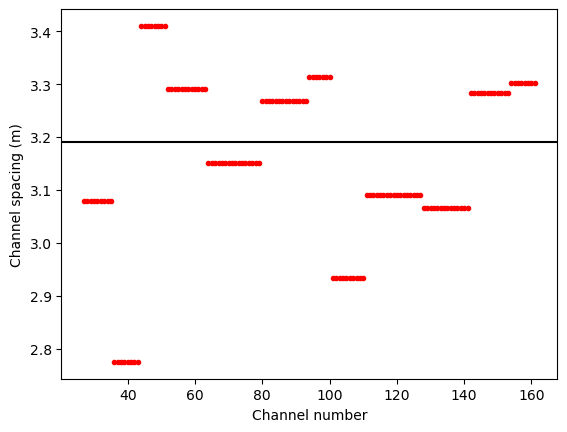

In [562]:
# Plot channel position residual
plt.figure()
plt.axhline(dx,c='k')
plt.scatter(ch[:-1],np.sqrt((xn[1:]-xn[:-1])**2 + (yn[1:]-yn[:-1])**2),c='r',marker='.')
plt.ylabel('Channel spacing (m)')
plt.xlabel('Channel number')

### Interpolate channel positions between tap points, version 2

Linear extrapolation between tap points, channel spacing is fixed, total distance is flexible

The residual distance for each segment is all absorbed in the last channel before each tap point. Alternatively the residual distance could be divided between the first and last channel so that each continuous, equally-spaced segement placed is at the midpoint of the uncertainty. 

In [563]:
dc = np.zeros(len(ch))
xc = dc.copy()
yc = dc.copy()

nt = len(chans)
for ii in range(nt-1):
    c0 = chans[ii] - chans[0]
    nc = chans[ii+1] - chans[ii]
    th = np.arctan2(yg[ii+1]-yg[ii],xg[ii+1]-xg[ii])
    xc[c0:c0+nc] = np.arange(nc)*dx*np.cos(th) + xg[ii]
    yc[c0:c0+nc] = np.arange(nc)*dx*np.sin(th) + yg[ii]
xc[-1] = xg[-1]
yc[-1] = yg[-1]
    
lonc,latc = myProj(xc,yc,inverse=True)

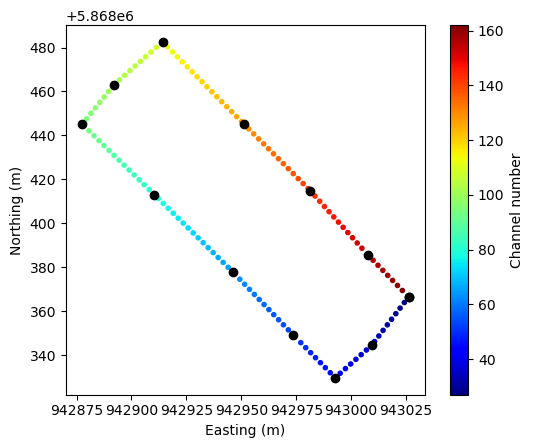

In [564]:
plt.figure()
cb = plt.scatter(xc,yc,c=ch,marker='.',cmap='jet')
plt.plot(xg,yg,'ko')
plt.colorbar(cb,label='Channel number')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.gca().set_aspect('equal')

In [565]:
print(xc[25] - xg[3], yc[25] - yg[3])

0.0 0.0


Text(0.5, 0, 'Channel number')

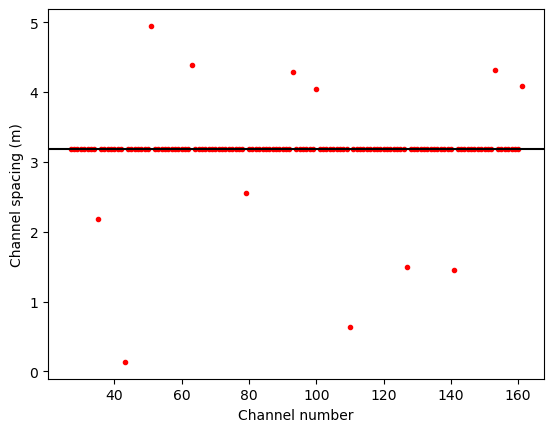

In [566]:
# Plot channel position residual
plt.figure()
plt.axhline(dx,c='k')
plt.scatter(ch[:-1],np.sqrt((xc[1:]-xc[:-1])**2 + (yc[1:]-yc[:-1])**2),c='r',marker='.')
plt.ylabel('Channel spacing (m)')
plt.xlabel('Channel number')

### Save to file

Channel numbers are stored in the description column of fiberpath.csv

In [567]:
# fiberroute.csv has lat/lon points along fiber path

with open('harper_fiberroute_v1.csv','w') as fp:
    fp.write('Fiber Route\n')
    fp.write(','.join(['Lat','Long','Elev','Description']) + '\n')
    for ii in range(len(ch)):
        fp.write('%.8f,%.8f,0,%d\n' % (latn[ii],lonn[ii],ch[ii]))
        
with open('harper_fiberroute_v2.csv','w') as fp:
    fp.write('Fiber Route\n')
    fp.write(','.join(['Lat','Long','Elev','Description']) + '\n')
    for ii in range(len(ch)):
        fp.write('%.8f,%.8f,0,%d\n' % (latc[ii],lonc[ii],ch[ii]))


In [568]:
# calibration.csv has coregistration/tap points along fiber path

long,latg = myProj(xg,yg,inverse=True)

with open('harper_calibration.csv','w') as fp:
    fp.write('Calibration\n')
    fp.write(','.join(['Lat','Long','Elev','Opt Dist','Scale Name',\
                       'Scale Number','Description','State','Purpose','Scale Suffix']) + '\n')
    for ii in range(len(chans)):
        fp.write('%.8f,%.8f,0,%.2f,,,,,,\n' % (latg[ii],long[ii],np.array(chans)[ii]*dx))